In [1]:
import torch
import numpy as np

from PIL import Image

from detectron2 import model_zoo
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.config import get_cfg
from detectron2.modeling import build_model
from detectron2.structures import ImageList

from einops import rearrange, reduce, repeat

from torchvision import transforms

from IPython.display import display

In [2]:
cfg_path = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(cfg_path))
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.01  # set threshold for this model
# cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.5
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(cfg_path)

model = build_model(cfg)
DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)

model.eval()

model_final_280758.pkl: 167MB [01:14, 2.25MB/s]                              


GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock

In [3]:
print(model.roi_heads)

StandardROIHeads(
  (box_pooler): ROIPooler(
    (level_poolers): ModuleList(
      (0): ROIAlign(output_size=(7, 7), spatial_scale=0.25, sampling_ratio=0, aligned=True)
      (1): ROIAlign(output_size=(7, 7), spatial_scale=0.125, sampling_ratio=0, aligned=True)
      (2): ROIAlign(output_size=(7, 7), spatial_scale=0.0625, sampling_ratio=0, aligned=True)
      (3): ROIAlign(output_size=(7, 7), spatial_scale=0.03125, sampling_ratio=0, aligned=True)
    )
  )
  (box_head): FastRCNNConvFCHead(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (fc1): Linear(in_features=12544, out_features=1024, bias=True)
    (fc_relu1): ReLU()
    (fc2): Linear(in_features=1024, out_features=1024, bias=True)
    (fc_relu2): ReLU()
  )
  (box_predictor): FastRCNNOutputLayers(
    (cls_score): Linear(in_features=1024, out_features=81, bias=True)
    (bbox_pred): Linear(in_features=1024, out_features=320, bias=True)
  )
)


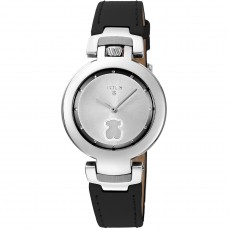

In [10]:
im = cv2.imread("../data/wdc/images/9003451_0.jpg")
display(Image.fromarray(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)))

In [11]:
from detectron2.engine import DefaultPredictor
predictor = DefaultPredictor(cfg)

with torch.no_grad():
    if cfg.INPUT.FORMAT == "RGB":
        im = im.shape[:, :, ::-1]

    height, width = im.shape[:2]
    im_ = predictor.aug.get_transform(im).apply_image(im)

    im_ = torch.as_tensor(im.astype("float32").transpose(2, 0, 1))

    inputs = {"image": im_, "height": height, "width": width}
    outputs = predictor.model([inputs])[0]

tensor([74, 12, 74], device='cuda:0')
Boxes(tensor([[ 71.1949,  66.2029, 157.0295, 153.3768],
        [ 61.4545,   8.2110, 164.9334, 224.0970],
        [ 61.9086,  30.0108, 167.3694, 202.4375]], device='cuda:0'))


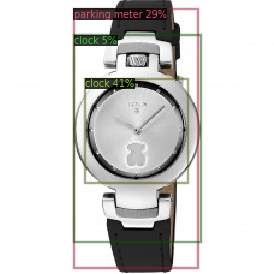

In [12]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
display(Image.fromarray(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)))

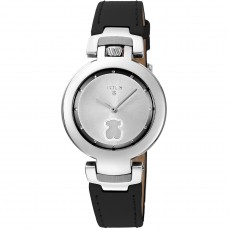

torch.Size([1, 256, 64, 64])
torch.Size([1, 256, 32, 32])
torch.Size([1, 256, 16, 16])
torch.Size([1, 256, 8, 8])
torch.Size([1, 256, 4, 4])


In [352]:
with torch.no_grad():
    if cfg.INPUT.FORMAT == "RGB":
        im = im.shape[:, :, ::-1]

    height, width = im.shape[:2]
    im_ = predictor.aug.get_transform(im).apply_image(im)

    im_ = torch.as_tensor(im.astype("float32").transpose(2, 0, 1))

    inputs = {"image": im_, "height": height, "width": width}
    model = predictor.model
    features = model.backbone(images.tensor)

    display(Image.fromarray(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)))
    for key in features.keys():
        print(features[key].shape)
#         plt.imshow(features[key][0,0,:,:].squeeze().cpu().numpy(), cmap='jet')
#         plt.show()

In [17]:
with torch.no_grad():
    if cfg.INPUT.FORMAT == "RGB":
        im = im.shape[:, :, ::-1]

    height, width = im.shape[:2]
    _im = predictor.aug.get_transform(im).apply_image(im)

    _im = torch.as_tensor(im.astype("float32").transpose(2, 0, 1))

    inputs = {"image": _im, "height": height, "width": width}
    model = predictor.model
    
    images = model.preprocess_image([inputs])
    features = model.backbone(images.tensor)
    proposals, _ = model.proposal_generator(images, features, None)
#     print(proposals[0])
    instances, _ = model.roi_heads(images, features, proposals, None)
    print(instances[0].pred_boxes)
    print(instances[0].scores.shape)
    print(instances[0])
    print(len(instances[0]))
    
    _in_features = [features[f] for f in model.roi_heads.in_features]
#     roi_features = model.roi_heads.box_pooler(in_features, [x.proposal_boxes for x in proposals])
    roi_features = model.roi_heads.box_pooler(_in_features, [x.pred_boxes for x in instances])
    print(roi_features.shape)
    
    roi_features = model.roi_heads.box_head(roi_features)
    print(roi_features.shape)
    
#     print(mask_features.shape)

Boxes(tensor([[ 71.1949,  66.2029, 157.0295, 153.3768],
        [ 61.4545,   8.2110, 164.9334, 224.0970],
        [ 61.9086,  30.0108, 167.3694, 202.4375]], device='cuda:0'))
torch.Size([3])
Instances(num_instances=3, image_height=229, image_width=229, fields=[pred_boxes: Boxes(tensor([[ 71.1949,  66.2029, 157.0295, 153.3768],
        [ 61.4545,   8.2110, 164.9334, 224.0970],
        [ 61.9086,  30.0108, 167.3694, 202.4375]], device='cuda:0')), scores: tensor([0.4053, 0.2871, 0.0527], device='cuda:0'), pred_classes: tensor([74, 12, 74], device='cuda:0')])
3
torch.Size([3, 256, 7, 7])
torch.Size([3, 1024])


In [365]:
print(cfg.MODEL.ROI_BOX_HEAD.NUM_CONV)
print(cfg.MODEL.ROI_BOX_HEAD.CONV_DIM)
print(cfg.MODEL.ROI_BOX_HEAD.NUM_FC)
print(cfg.MODEL.ROI_BOX_HEAD.FC_DIM)

0
256
2
1024


In [375]:
print(cfg.MODEL.ROI_BOX_HEAD)

BBOX_REG_LOSS_TYPE: smooth_l1
BBOX_REG_LOSS_WEIGHT: 1.0
BBOX_REG_WEIGHTS: (10.0, 10.0, 5.0, 5.0)
CLS_AGNOSTIC_BBOX_REG: False
CONV_DIM: 256
FC_DIM: 1024
NAME: FastRCNNConvFCHead
NORM: 
NUM_CONV: 0
NUM_FC: 2
POOLER_RESOLUTION: 7
POOLER_SAMPLING_RATIO: 0
POOLER_TYPE: ROIAlignV2
SMOOTH_L1_BETA: 0.0
TRAIN_ON_PRED_BOXES: False


In [243]:
modal = predictor.model
print(model.roi_heads.box_in_features)
for f in model.roi_heads.box_in_features:
    print(features[f].shape)

['p2', 'p3', 'p4', 'p5']
torch.Size([1, 256, 200, 128])
torch.Size([1, 256, 100, 64])
torch.Size([1, 256, 50, 32])
torch.Size([1, 256, 25, 16])


In [21]:
import torch
from torch import nn

from flash.core.data.utils import download_data
from flash.image import ImageEmbedder

# # 1. Download the data
# download_data("https://pl-flash-data.s3.amazonaws.com/hymenoptera_data.zip", "data/")

# # 2. Create an ImageEmbedder with resnet101 trained on imagenet.
# embedder = ImageEmbedder(backbone="resnet101")

# # 3. Generate an embedding from an image path.
# embeddings = embedder.predict(["data/hymenoptera_data/predict/153783656_85f9c3ac70.jpg"])

# # 4. Print embeddings shape
# print(embeddings[0].shape)

# 5. Create a tensor random image
random_image = torch.randn(1, 3, 244, 244)

# 6. Generate an embedding from this random image.
embeddings = embedder.predict(random_image, data_source="tensors")

# 7. Print embeddings shape
print(embeddings[0].shape)

torch.Size([2048, 7, 7])


In [15]:
from flash.image.backbones import IMAGE_CLASSIFIER_BACKBONES
print(IMAGE_CLASSIFIER_BACKBONES)

FlashRegistry(name=backbones, functions=[{'fn': <function load_simclr_imagenet at 0x7f61380db790>, 'name': 'simclr-imagenet', 'metadata': {'namespace': 'vision', 'package': 'bolts'}}, {'fn': <function load_swav_imagenet at 0x7f61380db9d0>, 'name': 'swav-imagenet', 'metadata': {'namespace': 'vision', 'package': 'bolts'}}, {'fn': <function catch_url_error.<locals>.wrapper at 0x7f6123d99ca0>, 'name': 'mobilenet_v2', 'metadata': {'namespace': 'vision', 'package': 'torchvision', 'type': 'mobilenet'}}, {'fn': <function catch_url_error.<locals>.wrapper at 0x7f6123d99d30>, 'name': 'vgg11', 'metadata': {'namespace': 'vision', 'package': 'torchvision', 'type': 'vgg'}}, {'fn': <function catch_url_error.<locals>.wrapper at 0x7f6123d99dc0>, 'name': 'vgg13', 'metadata': {'namespace': 'vision', 'package': 'torchvision', 'type': 'vgg'}}, {'fn': <function catch_url_error.<locals>.wrapper at 0x7f6123d99e50>, 'name': 'vgg16', 'metadata': {'namespace': 'vision', 'package': 'torchvision', 'type': 'vgg'}}, 